In [1]:
import sys
sys.path.append("../../../") 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os


In [3]:
import numpy as np
from hamiltonian import utils

In [4]:
path = []
for dirname, _, filenames in os.walk('../kaggle/input'):
    print(dirname)
    for filename in filenames:
        if (filename[-3:] == 'png'):
            path.append(os.path.join(dirname, filename))

In [5]:
fullpath = "../../../kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset"

os.listdir(fullpath)

['README.md.txt',
 'COVID',
 'Lung_Opacity',
 'Normal.metadata.xlsx',
 'Lung_Opacity.metadata.xlsx',
 'COVID.metadata.xlsx',
 'Viral Pneumonia',
 'Normal',
 'Viral Pneumonia.metadata.xlsx']

/home/proyecto/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


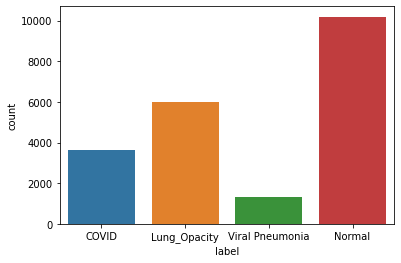

In [6]:
list_files=[]
for dir in os.listdir(fullpath):
  directory = os.path.join(fullpath,dir)
  
  if os.path.isdir(directory):
    for img in os.listdir(directory):
      list_files.append([os.path.join(dir,img),dir])
df = pd.DataFrame(list_files, columns=['id','label'])
df.describe()
list_files = []
for dir in os.listdir(fullpath):
  directory = os.path.join(fullpath,dir)

import seaborn as sns
sns.countplot(df.label)
plt.show()

In [7]:
import mxnet
from mxnet import image, nd
dim = 150

In [8]:
cant_img = 600#cantidad de imagenes a procesar

count = 0
'''
for img_path in glob.glob(DATASET_DIR + "/Normal/*"):
    count += 1
    normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
   
    if count > 300:
        break
   '''    
covid_images = []
count1 = 0

for img_path in glob.glob(fullpath + "/COVID/*"):
    count1 += 1
    imagen = image.imread(img_path)
    recorte = mxnet.img.imresize(imagen, dim,dim)
    covid_images.append(recorte)
    if count1 > cant_img:
        break
'''Lung_opcaity = []
count2 = 0

for img_path in glob.glob(fullpath + "/Lung_Opacity/*"):
    count2 += 1
    imagen = image.imread(img_path)
    recorte = mxnet.img.imresize(imagen, dim,dim)
    Lung_opcaity.append(recorte)
    if count2 > cant_img:
        break'''

normal_images = []
count2 = 0

for img_path in glob.glob(fullpath + "/Normal/*"):
    count2 += 1
    imagen = image.imread(img_path)
    recorte = mxnet.img.imresize(imagen, dim,dim)
    normal_images.append(recorte)
    if count2 > cant_img:
        break
        
Viral_pneumonia = []
count3 = 0

for img_path in glob.glob(fullpath + "/Viral Pneumonia/*"):
    count3 += 1
    imagen = image.imread(img_path)
    recorte = mxnet.img.imresize(imagen, dim,dim)
    Viral_pneumonia.append(recorte)
    if count3 > cant_img:
        break
        

                
        
total=count1+count2+count3#total imagenes

[11:49:56] /home/proyecto/mxnet/src/storage/storage.cc:199: Using Pooled (Naive) StorageManager for CPU


In [9]:
y=[]
images_together = []#nd.zeros(shape=((cant_img+1)*3,150,150,3))
'''
for i in normal_images:
    images_together.append(img_to_array(i))
    target.append(0)
'''
#count_global = 0

count1 = 0
for i in covid_images:
    images_together.append(i.asnumpy())#[count_global] = i
    y.append(0)
    count1=count1+1
    #count_global=count_global+1

'''count2 = 0
for i in Lung_opcaity:
    images_together.append(i.asnumpy())#[count_global] = i
    y.append(1)
    count2=count2+1'''
    #count_global=count_global+1
    
count2 = 0
for i in normal_images:
    images_together.append(i.asnumpy())#[count_global] = i
    y.append(1)
    count2=count2+1
    #count_global=count_global+1
    
count3 = 0
for i in Viral_pneumonia:
    images_together.append(i.asnumpy())#[count_global] = i
    y.append(2)
    count3=count3+1
    #count_global=count_global+1

print(len(images_together))
print(len(y))




1803
1803


0 Clase: Covid
1 Clase: Normal
2 Clase: Neumonia_viral


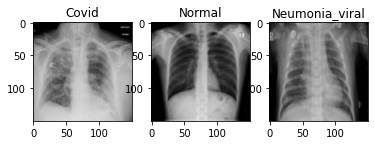

In [10]:
images_together[0]
clases = ["Covid","Normal", "Neumonia_viral"]
indices = [5,804,1500]

fig, (ax1,ax2, ax3) = plt.subplots(1,3)

ax1.title.set_text('Covid')
ax1.imshow(images_together[indices[0]])
ax2.title.set_text('Normal')
ax2.imshow(images_together[indices[1]])
ax3.title.set_text('Neumonia_viral')
ax3.imshow(images_together[indices[2]])

for i in range(len(indices)):
    print(y[indices[i]],"Clase: "+clases[i])

In [11]:
for i in range(len(images_together)):#normalizacion
    images_together[i] = images_together[i]/255.0

In [12]:
import mxnet.gluon.probability as mxp
y=np.array(y)
print(y)

[0 0 0 ... 2 2 2]


In [13]:
import numpy as np
images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)
print("type of images together",type(images_together))
print("shape of y: ",y.shape)

shape of images together:  (1803, 150, 150, 3)
type of images together <class 'numpy.ndarray'>
shape of y:  (1803,)


In [14]:
images_together=images_together.reshape((cant_img+1)*3,3,dim,dim)
#print(images_together.shape)
#images_together=images_together.reshape((cant_img+1)*3,3*150*150)
print(images_together.shape)
images_together = images_together.astype(np.float32)
print(images_together.dtype)
print(y.shape)
print(y.dtype)

(1803, 3, 150, 150)
float32
(1803,)
int64


In [15]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(images_together, y, test_size=0.2, random_state=42, shuffle = True)

images_together = np.concatenate((X_train, x_test))
y = np.concatenate((y_train, y_test))

In [16]:
import mxnet as mx
from mxnet import gluon, nd

num_gpus = 1
model_ctx = mxnet.cpu()

num_workers = 8
batch_size = 40 

dataset_train = gluon.data.dataset.ArrayDataset(X_train, y_train)
data_loader_train = gluon.data.DataLoader(dataset_train, batch_size = batch_size, shuffle=True, last_batch='discard',  num_workers=0)

dataset_test = gluon.data.dataset.ArrayDataset(X_train, y_train)
data_loader_test = gluon.data.DataLoader(dataset_test, batch_size = batch_size,  shuffle=True, last_batch='discard', num_workers=0)

In [17]:
print(data_loader_train)
for X,y in data_loader_train:
    print(X.shape)
    print(y.shape)
    break

(40, 3, 150, 150)
(40,)


# SGD - Resnet

In [18]:
import numpy as np
from hamiltonian import utils

num_examples,channel,w,h=X_train.shape
num_input=channel*w*h
num_outputs=len(np.unique(y_train))

#y_train=utils.one_hot(y_train,num_outputs)
#y_test=utils.one_hot(y_test,num_outputs)

In [19]:
print(num_examples)
print(num_input)
print(num_outputs)

1442
67500
3


In [20]:
import mxnet as mx
from mxnet import nd, autograd, gluon
model_ctx=mx.cpu()
hyper={'alpha':10.}
#in_units=X_train.shape[2],X_train.shape[3]
in_units=(dim,dim)
out_units=len(np.unique(y_train))
print(in_units, out_units)
n_layers=18
pre_trained=False

(150, 150) 3


In [21]:
import mxnet as mx
from hamiltonian.inference.sgd import sgd
from hamiltonian.models.softmax import resnet_softmax

model=resnet_softmax(hyper,in_units,out_units,n_layers,pre_trained,ctx=model_ctx)
inference=sgd(model,model.par,step_size=0.0001,ctx=model_ctx)

In [22]:
par,loss=inference.fit(epochs=10,batch_size=batch_size,data_loader=data_loader_train,verbose=True)

 10%|████▎                                      | 1/10 [03:37<32:38, 217.62s/it]

loss: 6.1844


 20%|████████▌                                  | 2/10 [07:11<28:44, 215.59s/it]

loss: 6.1153


 30%|████████████▉                              | 3/10 [10:44<25:01, 214.50s/it]

loss: 6.0376


 40%|█████████████████▏                         | 4/10 [14:17<21:21, 213.54s/it]

loss: 5.9563


 50%|█████████████████████▌                     | 5/10 [17:49<17:46, 213.31s/it]

loss: 5.8767


 60%|█████████████████████████▊                 | 6/10 [21:22<14:12, 213.07s/it]

loss: 5.8075


 70%|██████████████████████████████             | 7/10 [24:55<10:39, 213.13s/it]

loss: 5.7501


 80%|██████████████████████████████████▍        | 8/10 [28:29<07:06, 213.27s/it]

loss: 5.7018


 90%|██████████████████████████████████████▋    | 9/10 [32:02<03:33, 213.34s/it]

loss: 5.6599


100%|██████████████████████████████████████████| 10/10 [35:35<00:00, 213.55s/it]

loss: 5.6270


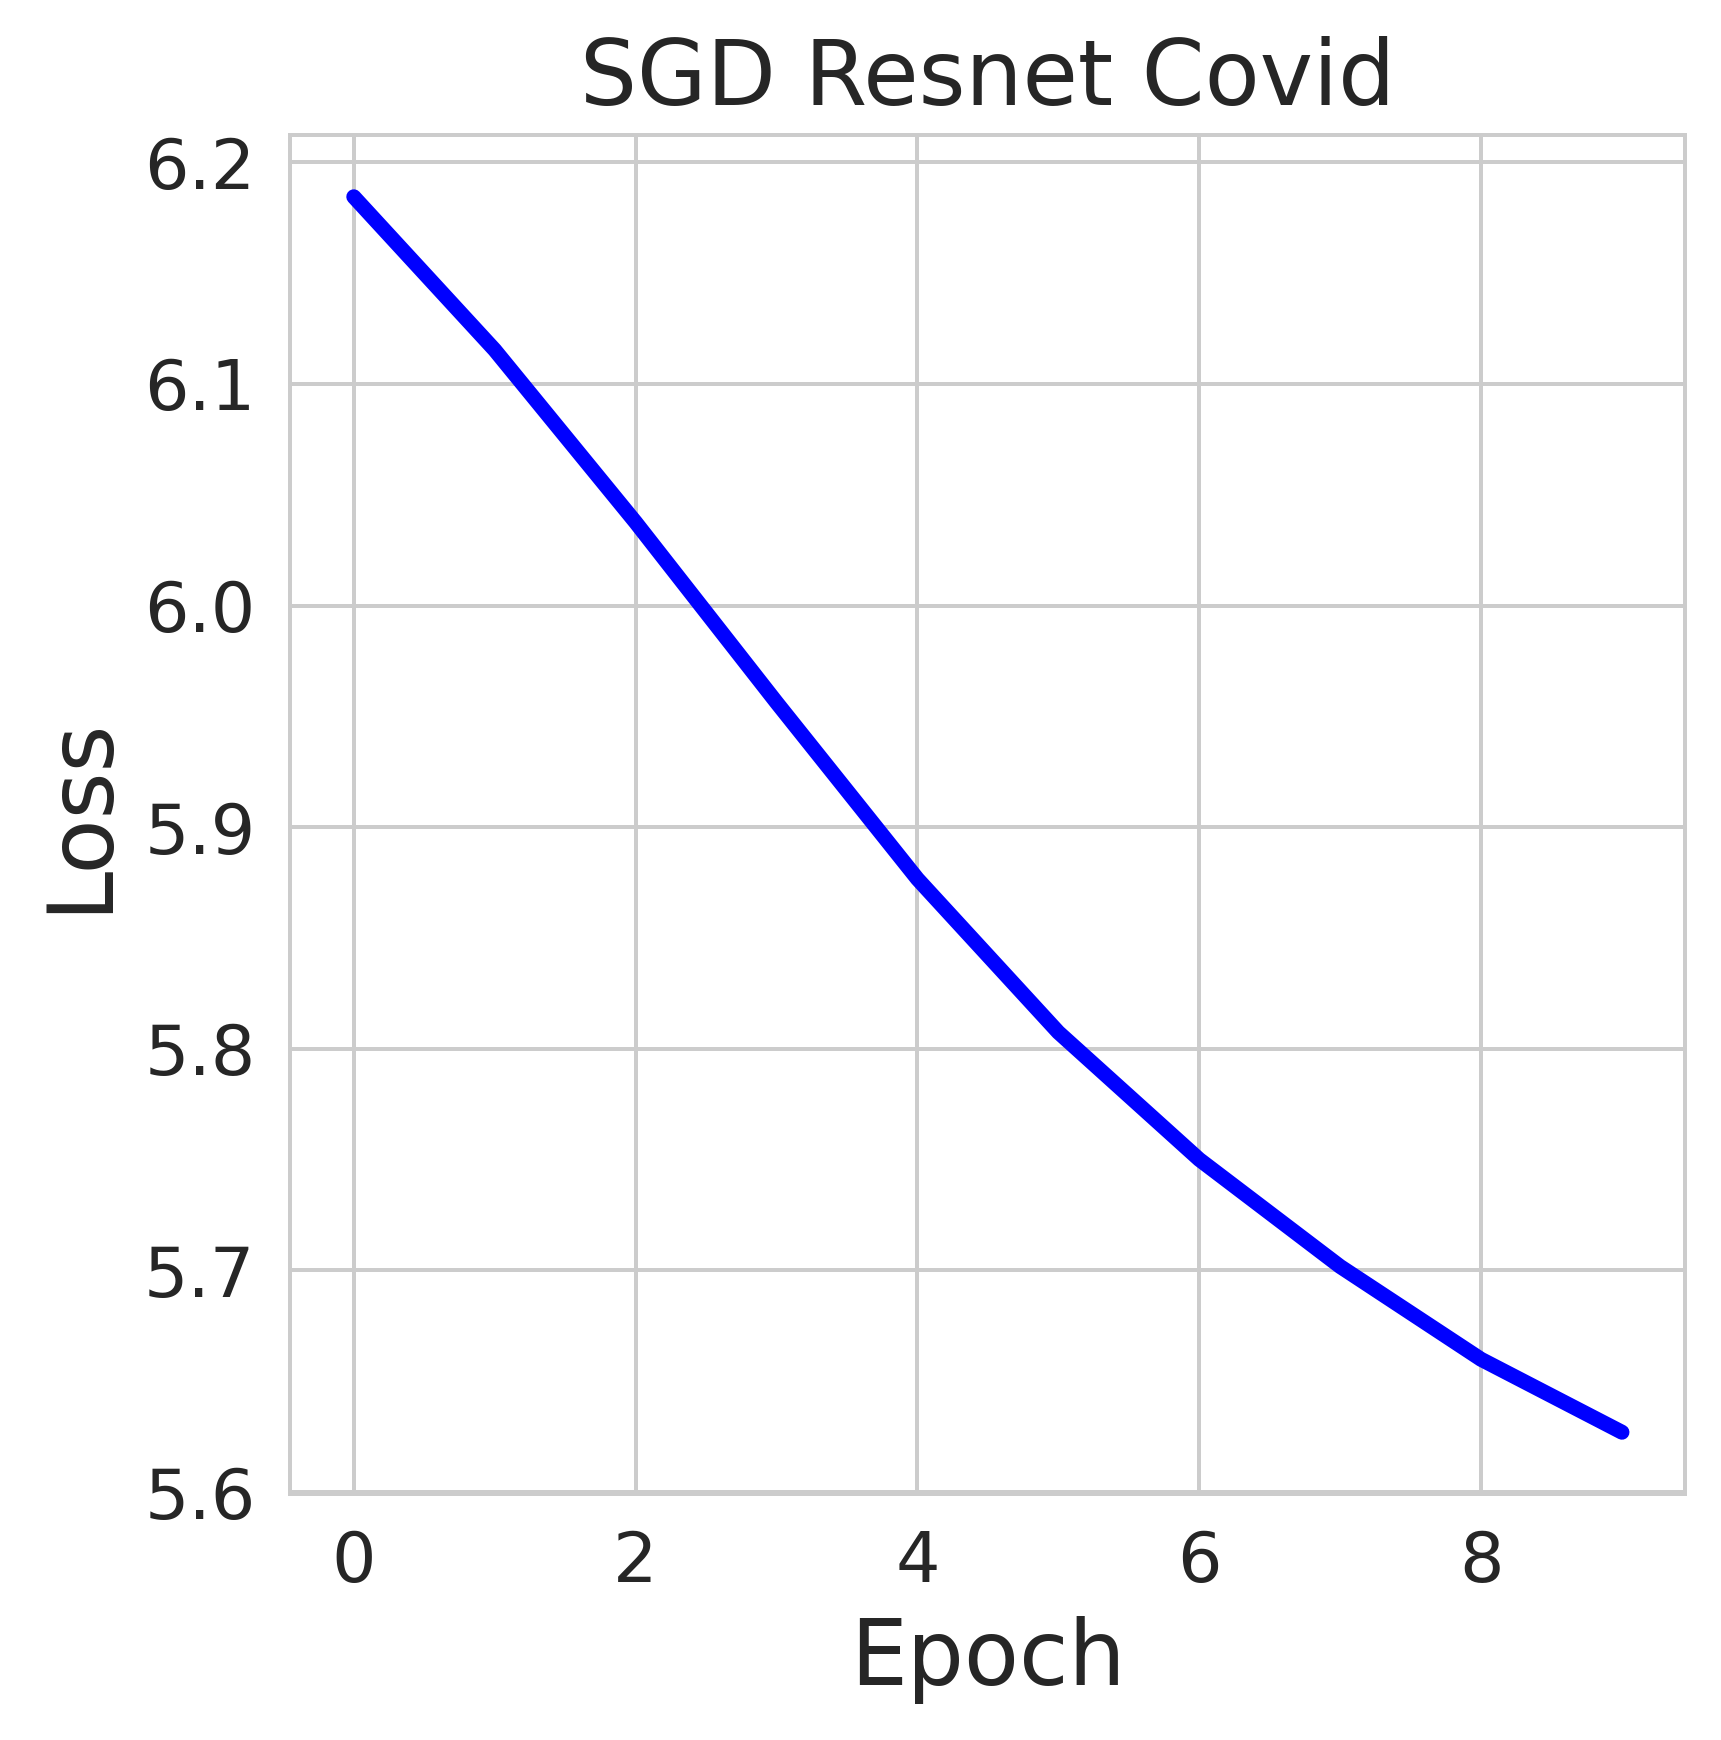

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 360
sns.set_style("whitegrid")


fig=plt.figure(figsize=[5,5])
plt.plot(loss,color='blue',lw=3)
plt.xlabel('Epoch', size=18)
plt.ylabel('Loss', size=18)
plt.title('SGD Resnet Covid', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

In [24]:
total_samples,total_labels,log_like=inference.predict(par,batch_size=batch_size,num_samples=5,data_loader=data_loader_test)  

In [25]:
y_hat=np.quantile(total_samples,.5,axis=0)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(np.int32(total_labels),np.int32(y_hat)))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       471
           1       0.65      0.73      0.69       496
           2       0.90      0.88      0.89       473

    accuracy                           0.75      1440
   macro avg       0.76      0.75      0.75      1440
weighted avg       0.75      0.75      0.75      1440

